In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

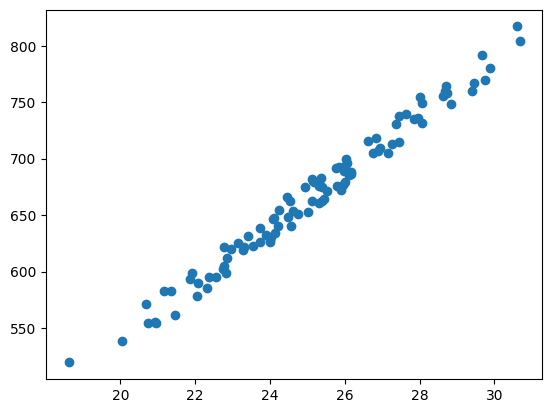

In [2]:
#Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])
plt.scatter(data['area'], data['price'])
plt.show()

In [4]:
data = (data - data.min()) / (data.max() - data.min())  #Normalize

In [15]:
model = K.Sequential([
                      #normalizer,
                      Dense(1, input_shape = [1,], activation=None)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [44]:
model.fit(x=data['area'],y=data['price'], epochs=400, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/400
2/2 [==============================] - 0s 117ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 2/400
2/2 [==============================] - 0s 71ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 3/400
2/2 [==============================] - 0s 53ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 5/400
2/2 [==============================] - 0s 47ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 6/400
2/2 [==============================] - 0s 62ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/400
2/2 [==============================] - 0s 50ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/400
2/2 [==============================] - 0s 80ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/400
2/2 [==============================] - 0s 63ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 10/400
2/2 [==============================] - 0s 77ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 11/400
2/2 [

In [45]:
y_pred = model.predict(data['area'])

4/4 [==============================] - 0s 4ms/step


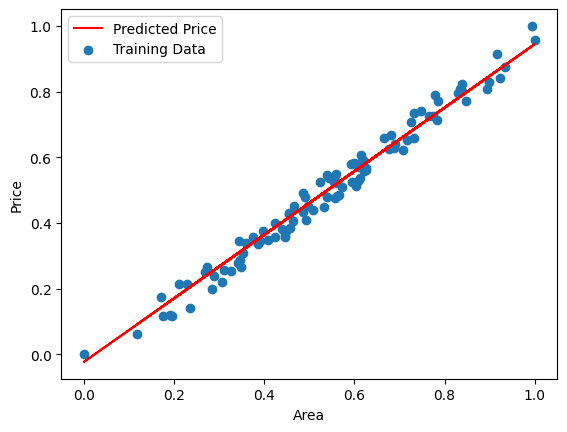

In [46]:
plt.plot(data['area'], y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

In [47]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.9677794]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.02325171], dtype=float32)>]